In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
84,5.4,3.0,4.5,1.5,versicolor
126,6.2,2.8,4.8,1.8,virginica
52,6.9,3.1,4.9,1.5,versicolor
100,6.3,3.3,6.0,2.5,virginica
42,4.4,3.2,1.3,0.2,setosa


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
df['species'] = LabelEncoder().fit_transform(df['species'])

In [7]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,2
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
83,6.0,2.7,5.1,1.6,1
36,5.5,3.5,1.3,0.2,0


In [40]:
df = df[['sepal_length','petal_length','species']]

In [41]:
X = df.drop(columns=('species'), axis=1)
y = df['species']

In [42]:
X.shape, y.shape

((150, 2), (150,))

In [43]:
X.sample()

,sepal_length,petal_length
9,4.9,1.5


In [44]:
y.sample()

,species
54,1


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
lr = LogisticRegression(multi_class='multinomial')

In [48]:
lr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [49]:
y_pred = lr.predict(X_test)

In [50]:
from sklearn.metrics import accuracy_score, precision_score, precision_score, f1_score, confusion_matrix

In [51]:
print(accuracy_score(y_test,y_pred))

1.0


In [52]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2
0,10,0,0
1,0,9,0
2,0,0,11


In [53]:
import numpy as np

In [56]:
# prediction
query = np.array([[3.4, 2.7]]) # Example: Added two more features to match the model's expectation
lr.predict_proba(query)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[8.09965681e-01, 1.89436112e-01, 5.98206953e-04]])

In [57]:
lr.predict(query)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [58]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


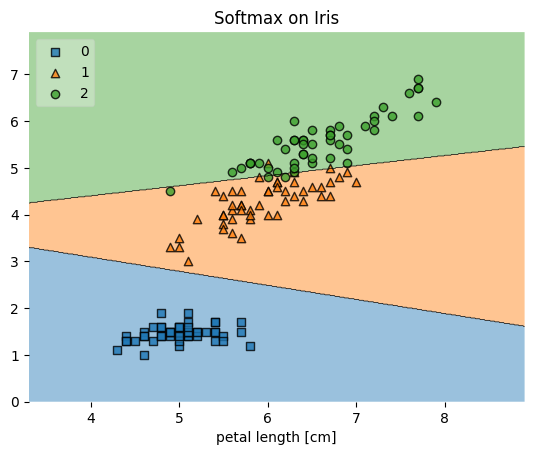

In [59]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X.values, y.values, lr, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.xlabel('petal length [cm]')
plt.title('Softmax on Iris')

plt.show()